In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [6]:
sentiment.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [8]:
sentiment.isna().sum()
trades.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [9]:
sentiment.duplicated().sum()
trades.duplicated().sum()

np.int64(0)

In [10]:
sentiment["date"] = pd.to_datetime(sentiment["date"])

In [11]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [12]:
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"],
dayfirst=True )

In [13]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [14]:
trades["Timestamp IST"].tail(10)

,Timestamp IST
211214,2025-04-25 15:35:00
211215,2025-04-25 15:35:00
211216,2025-04-25 15:35:00
211217,2025-04-25 15:35:00
211218,2025-04-25 15:35:00
211219,2025-04-25 15:35:00
211220,2025-04-25 15:35:00
211221,2025-04-25 15:35:00
211222,2025-04-25 15:35:00
211223,2025-04-25 15:35:00


In [15]:
trades["date"] = trades["Timestamp IST"].dt.date
trades["date"] = pd.to_datetime(trades["date"])

In [16]:
print(trades["date"].dtype)
print(sentiment["date"].dtype)

datetime64[ns]
datetime64[ns]


In [17]:
trades["date"] = trades["Timestamp IST"].dt.floor("D")

In [18]:
df = trades.merge(
    sentiment[["date", "classification", "value"]],
    on="date",
    how="left"
)

In [19]:
print(df.shape)
print(df["classification"].isna().sum())

(211224, 19)
6


step-5      BASIC FEATURE ENGINEERING

In [20]:
df["win"] = df["Closed PnL"] > 0

In [21]:
df["Direction"] = df["Direction"].str.lower()

In [22]:
daily_pnl = df.groupby(["date","classification"])["Closed PnL"].sum().reset_index()

In [23]:
daily_winrate = df.groupby(["date","classification"])["win"].mean().reset_index()

In [24]:
daily_trades = df.groupby(["date","classification"]).size().reset_index(name="trade_count")

In [25]:
daily_size = df.groupby(["date","classification"])["Size USD"].mean().reset_index()

In [26]:
df.groupby("classification")["Closed PnL"].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


In [27]:
df.groupby("classification")["win"].mean()

,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


In [28]:
df.groupby("classification")["Size USD"].mean()

,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


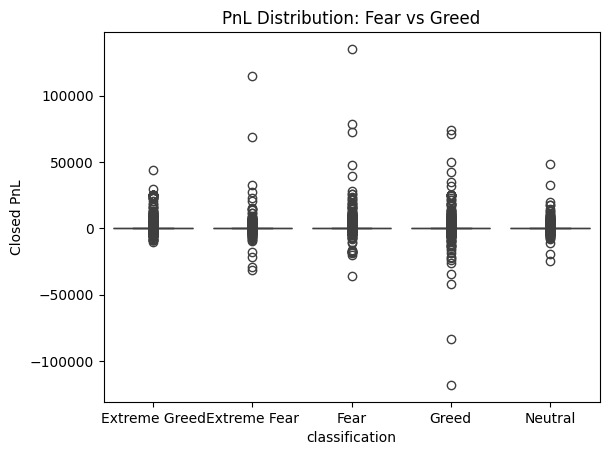

In [29]:
plt.figure()
sns.boxplot(x="classification", y="Closed PnL", data=df)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

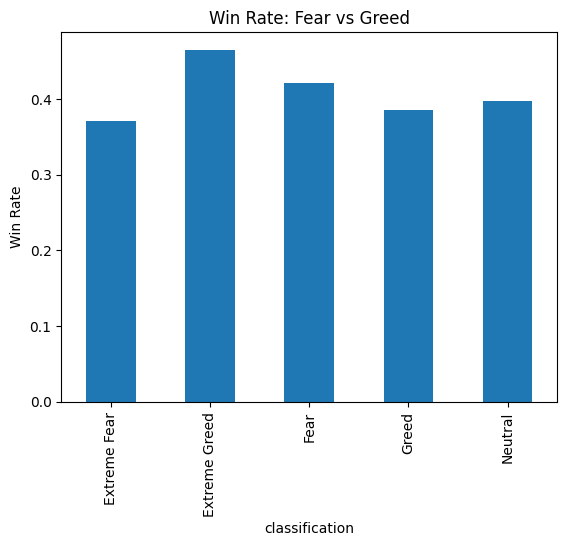

In [30]:
plt.figure()
df.groupby("classification")["win"].mean().plot(kind="bar")
plt.title("Win Rate: Fear vs Greed")
plt.ylabel("Win Rate")
plt.show()

In [31]:
account_trade_count = df.groupby("Account").size()

threshold = account_trade_count.median()

df["trader_type"] = df["Account"].map(
    lambda x: "High Frequency" if account_trade_count[x] > threshold else "Low Frequency"
)

In [32]:
df.groupby(["trader_type","classification"])["Closed PnL"].mean()

trader_type     classification
High Frequency  Extreme Fear       34.163353
                Extreme Greed      62.870911
                Fear               51.323784
                Greed              25.004641
                Neutral            34.579701
Low Frequency   Extreme Fear       35.941979
                Extreme Greed     103.264685
                Fear               80.835791
                Greed             210.210287
                Neutral            31.845656
Name: Closed PnL, dtype: float64

In [33]:
size_threshold = df["Size USD"].median()

df["size_group"] = np.where(
    df["Size USD"] > size_threshold,
    "Large Trade",
    "Small Trade"
)

In [34]:
df.groupby(["size_group","classification"])["Closed PnL"].mean()

size_group   classification
Large Trade  Extreme Fear       61.196379
             Extreme Greed     140.570044
             Fear               97.025581
             Greed              84.301244
             Neutral            69.581271
Small Trade  Extreme Fear        1.157202
             Extreme Greed       9.628661
             Fear                3.580906
             Greed               3.609685
             Neutral             2.188668
Name: Closed PnL, dtype: float64

In [35]:
long_short = df.groupby(["classification","Direction"]).size().unstack()
print(long_short)

Direction       auto-deleveraging     buy  close long  close short  \
classification                                                       
Extreme Fear                  NaN   807.0      6241.0       3117.0   
Extreme Greed                 NaN  5132.0      7186.0       6497.0   
Fear                          NaN  3207.0     17260.0       9221.0   
Greed                         8.0  4685.0      7998.0      11322.0   
Neutral                       NaN  2885.0      9993.0       5850.0   

Direction       liquidated isolated short  long > short  open long  \
classification                                                       
Extreme Fear                          NaN           5.0     7005.0   
Extreme Greed                         NaN           7.0     6300.0   
Fear                                  NaN          14.0    17824.0   
Greed                                 1.0          16.0     8544.0   
Neutral                               NaN          15.0    10222.0   

Direction       op

In [37]:
df[["Closed PnL","Size USD","value"]].corr()

,Closed PnL,Size USD,value
Closed PnL,1.000000,0.123589,0.008121
Size USD,0.123589,1.000000,-0.029843
value,0.008121,-0.029843,1.000000


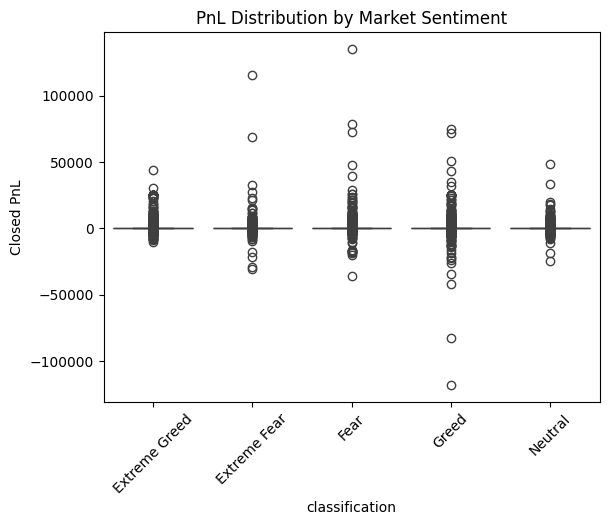

In [39]:
plt.figure()
sns.boxplot(x="classification", y="Closed PnL", data=df)
plt.title("PnL Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.show()

In [38]:
df.groupby("classification")["win"].mean()

,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


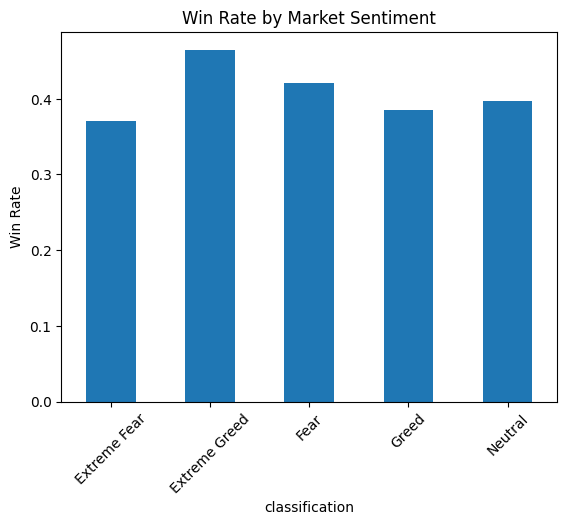

In [40]:
plt.figure()
df.groupby("classification")["win"].mean().plot(kind="bar")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.show()

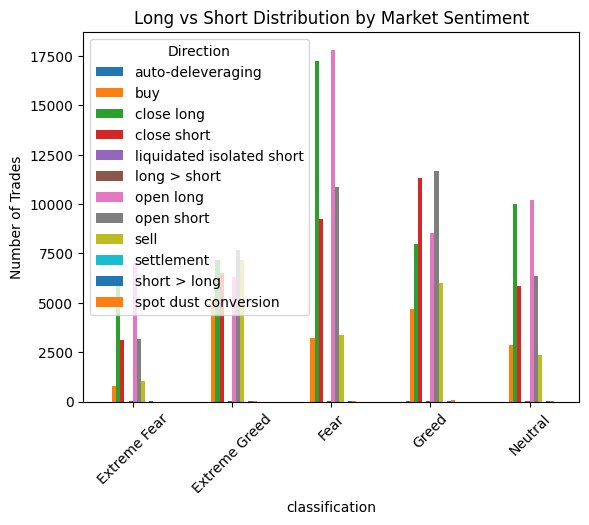

In [41]:
long_short = df.groupby(["classification","Direction"]).size().unstack()

long_short.plot(kind="bar")
plt.title("Long vs Short Distribution by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.show()